In [ ]:
import os
import pandas as pd
import datetime
import numpy as np
import math

In [2]:
# Reading data and adding test and train data together:

df = pd.read_csv("Road_Traffic_Fine_Management_Process-test.csv")
df = df.append(pd.read_csv('Road_Traffic_Fine_Management_Process-training.csv'))

In [3]:
# Show the unique types of events.
df['event concept:name'].unique()

array(['Create Fine', 'Payment', 'Send Fine', 'Insert Fine Notification',
       'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture',
       'Add penalty', 'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge',
       'Send for Credit Collection'], dtype=object)

In [4]:
# Convert the time column to a python datetime object:

def to_date(x):
    day, month, year = str(x).split(" ")[0].split('-')
    return datetime.date(int(year), int(month), int(day))


df['event time:timestamp'] = df['event time:timestamp'].apply(to_date)

In [5]:
df = df.sort_values(by=['case concept:name', 'event time:timestamp'], ascending=[True, False])
case = None
inter_event_times = []
total_times = []
end = None
for index, row in df.iterrows():
    current = row['case concept:name']
    if case != current:
        if end != None:
            total_times.append(end-start)
        case = current
        start = row['event time:timestamp']
        inter_event_times.append(datetime.timedelta(0))
    else:
        end = row['event time:timestamp']
        inter_event_times.append(start-end)
df['time-to-end'] = inter_event_times

df = df.sort_values(by=['case concept:name', 'event time:timestamp'])
case = None
inter_event_times = []
total_times = []
end = None
for index, row in df.iterrows():
    current = row['case concept:name']
    if case != current:
        if end != None:
            total_times.append(end-start)
        case = current
        start = row['event time:timestamp']
        inter_event_times.append(datetime.timedelta(0))
    else:
        end = row['event time:timestamp']
        inter_event_times.append(end-start)
        
df['inter-event-time'] = inter_event_times

In [6]:
mean = sum(i.total_seconds() for i in total_times)/len(total_times)
#estimated = 
def to_seconds(x):
    return x.total_seconds()
df['estimator'] = mean - df['inter-event-time'].apply(to_seconds) 


In [7]:
def to_days(x):
    return datetime.timedelta(seconds=x)
df['estimator'] = df['estimator'].apply(to_days)

In [8]:
math.sqrt(sum((df['time-to-end'] - df['estimator']).apply(to_seconds).apply(lambda x: x ** 2))/len(df))/3600/24

361.96429918807195

In [16]:
times = pd.DataFrame(df.groupby(by='case concept:name')['time-to-end'].max()).reset_index()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

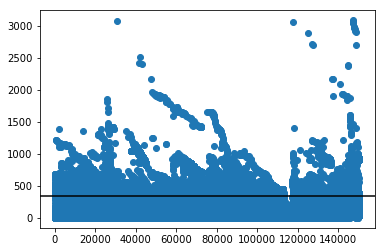

In [28]:
plt.scatter(times.index, times['time-to-end'].apply(to_seconds)/3600/34)
plt.axhline(341, color='black')

(array([4.6329e+04, 9.8340e+03, 1.0802e+04, 6.1870e+03, 4.0570e+03,
        3.0190e+03, 1.5910e+03, 1.1060e+03, 1.2420e+03, 2.2720e+03,
        3.8560e+03, 6.7700e+03, 7.7380e+03, 9.3380e+03, 7.8800e+03,
        5.9380e+03, 4.1600e+03, 3.1720e+03, 2.9730e+03, 1.6640e+03,
        7.8900e+02, 1.7660e+03, 2.4700e+03, 1.7140e+03, 1.0640e+03,
        3.3600e+02, 2.2700e+02, 4.7200e+02, 2.5700e+02, 2.6100e+02,
        3.0700e+02, 1.3600e+02, 9.8000e+01, 8.8000e+01, 7.0000e+01,
        3.7000e+01, 3.9000e+01, 3.7000e+01, 1.1000e+01, 1.3000e+01,
        7.0000e+00, 5.0000e+00, 1.6000e+01, 2.0000e+00, 1.8000e+01,
        2.7000e+01, 1.8000e+01, 1.0000e+01, 3.0000e+00, 5.0000e+00,
        6.0000e+00, 8.0000e+00, 8.0000e+00, 3.2000e+01, 1.0000e+00,
        1.2000e+01, 2.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00,
        4.0000e+00, 1.8000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

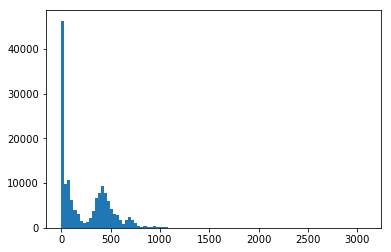

In [32]:
plt.hist(times['time-to-end'].apply(to_seconds)/3600/34, bins=100)

In [25]:
# Filter out the cases that seem to have no sensible end.

cases = df[(df['event concept:name'] == 'Send Appeal to Prefecture') | (df['event concept:name'] == 'Payment') | (df['event concept:name'] == 'Send for Credit Collection')]['case concept:name']
special_cases = np.setdiff1d(df['case concept:name'].unique(), np.array(cases))
df[df['case concept:name'].isin(special_cases)].sort_values(by=['case concept:name', 'event time:timestamp'])

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
2742,516886429171712,S51241,Create Fine,complete,2000-06-24
8118,516886429171713,S51241,Send Fine,complete,2000-08-24
2161,516980918452224,S51278,Create Fine,complete,2000-06-16
7725,516980918452225,S51278,Send Fine,complete,2000-08-24
2345,516989508386816,S51282,Create Fine,complete,2000-06-18
7726,516989508386817,S51282,Send Fine,complete,2000-08-24
2825,517023868125184,S51294,Create Fine,complete,2000-06-25
7732,517023868125185,S51294,Send Fine,complete,2000-08-24
4312,517131242307584,S51338,Create Fine,complete,2000-07-15
9361,517131242307585,S51338,Send Fine,complete,2000-08-29


In [ ]:
times.sort_values('time-to-end')

In [39]:
df[df['case concept:name']=='S194451']

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp,time-to-end,inter-event-time,estimator
439946,503937102774273,S194451,Payment,complete,2013-06-06,0 days,0 days,341 days 16:04:35.801528
439948,503937102774272,S194451,Create Fine,complete,2013-06-06,0 days,0 days,341 days 16:04:35.801528
